In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
df = pd.read_csv('data/Time.csv')
df.head()

,date,time,test,negative,confirmed,released,deceased
0,2020-01-20,16,1,0,1,0,0
1,2020-01-21,16,1,0,1,0,0
2,2020-01-22,16,4,3,1,0,0
3,2020-01-23,16,22,21,1,0,0
4,2020-01-24,16,27,25,2,0,0


In [3]:
df.dtypes

date         object
time          int64
test          int64
negative      int64
confirmed     int64
released      int64
deceased      int64
dtype: object

In [4]:
df['date'] = pd.to_datetime(df['date'])
df['time'] = pd.to_numeric(df['time'])
df['test'] = pd.to_numeric(df['test'])
df['negative'] = pd.to_numeric(df['negative'])
df['confirmed'] = pd.to_numeric(df['confirmed'])
df['release'] = pd.to_numeric(df['released'])
df['deceased'] = pd.to_numeric(df['deceased'])

In [5]:
df_diff = df.diff(axis=0)
df_diff.loc[0:0,'date':'release'] = '1 days', 1, 0, 1, 0, 1, 0, 0
del df_diff['date']
del df_diff['time']

In [6]:
df_diff = df_diff.add_prefix('daily_')
df = df.add_prefix('commulative_')

In [7]:
df = pd.concat([df, df_diff], axis=1)

In [8]:
df

,commulative_date,commulative_time,commulative_test,commulative_negative,commulative_confirmed,commulative_released,commulative_deceased,commulative_release,daily_test,daily_negative,daily_confirmed,daily_released,daily_deceased,daily_release
0,2020-01-20,16,1,0,1,0,0,0,0.0,1.0,0.0,1.0,0.0,0.0
1,2020-01-21,16,1,0,1,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,2020-01-22,16,4,3,1,0,0,0,3.0,3.0,0.0,0.0,0.0,0.0
3,2020-01-23,16,22,21,1,0,0,0,18.0,18.0,0.0,0.0,0.0,0.0
4,2020-01-24,16,27,25,2,0,0,0,5.0,4.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158,2020-06-26,0,1232315,1200885,12602,11172,282,11172,11837.0,11870.0,39.0,198.0,0.0,198.0
159,2020-06-27,0,1243780,1211261,12653,11317,282,11317,11465.0,10376.0,51.0,145.0,0.0,145.0
160,2020-06-28,0,1251695,1219975,12715,11364,282,11364,7915.0,8714.0,62.0,47.0,0.0,47.0
161,2020-06-29,0,1259954,1228698,12757,11429,282,11429,8259.0,8723.0,42.0,65.0,0.0,65.0


In [9]:
melt_df = pd.melt(df, id_vars=['commulative_date'], value_vars=['commulative_test',
                                                                'commulative_negative',
                                                                'commulative_confirmed',
                                                                'commulative_released',
                                                                'commulative_deceased',
                                                                'commulative_release',
                                                                'daily_test',
                                                                'daily_negative',
                                                                'daily_confirmed',
                                                                'daily_released',
                                                                'daily_deceased',
                                                                'daily_release'])
melt_df


,commulative_date,variable,value
0,2020-01-20,commulative_test,1.0
1,2020-01-21,commulative_test,1.0
2,2020-01-22,commulative_test,4.0
3,2020-01-23,commulative_test,22.0
4,2020-01-24,commulative_test,27.0
...,...,...,...
1951,2020-06-26,daily_release,198.0
1952,2020-06-27,daily_release,145.0
1953,2020-06-28,daily_release,47.0
1954,2020-06-29,daily_release,65.0


/Users/josephschmit/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


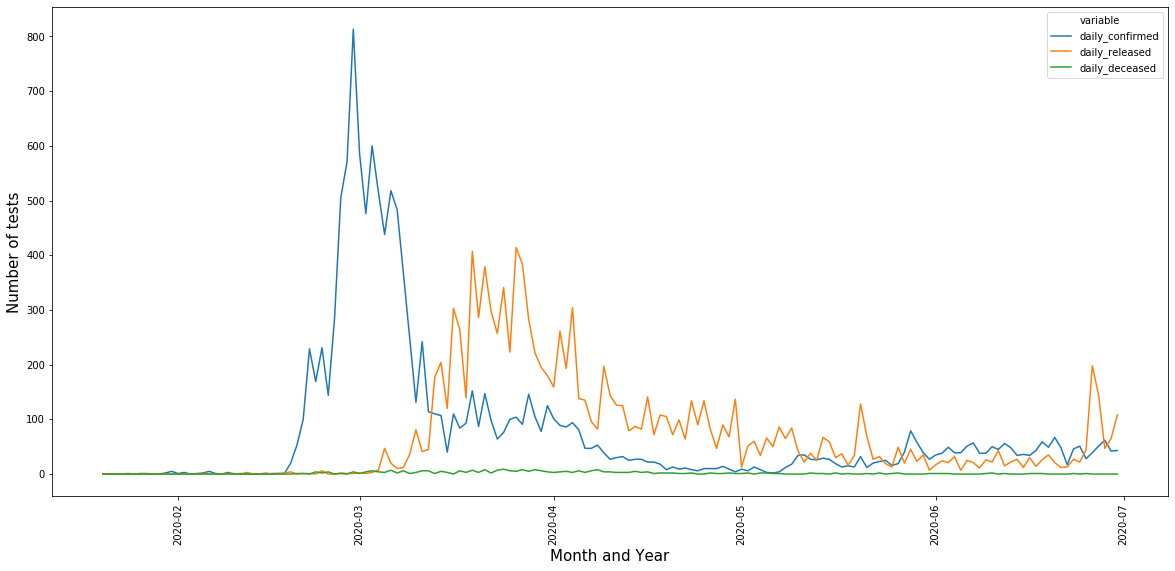

In [10]:
plt.figure(figsize=(20,9))
sns.lineplot(data=melt_df[(melt_df['variable'].str.startswith('daily'))& (melt_df['variable'].str.contains('released') | 
                                                                          melt_df['variable'].str.contains('confirmed')|
                                                                          melt_df['variable'].str.contains('deceased'))], 
             x='commulative_date',
             y='value', 
             hue = 'variable')
plt.xlabel("Month and Year", size=15)
plt.ylabel("Number of tests", size=15)
plt.title("", size=18)
plt.xticks(rotation=90);

In [11]:
plt.savefig('Daily_Example.png')

<Figure size 432x288 with 0 Axes>